In [1]:
#!cp -R '/content/drive/My Drive/Dataset_2' '/content/'

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
batch_size = 32
epochs = 100
img_height = 224
img_width = 224
train_dir = '/content/drive/My Drive/Dataset_2/train'
val_dir = '/content/drive/My Drive/Dataset_2/val'

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    horizontal_flip=True,
    zoom_range=0.3
)

In [21]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [22]:
train_data = train_data_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

Found 652 images belonging to 3 classes.


In [23]:
val_data = validation_data_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

Found 288 images belonging to 3 classes.


In [24]:
# importing libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import SGD

# build a sequential model

model = Sequential()
model.add(InputLayer(input_shape=(img_height, img_width, 3)))

# 1st conv block

model.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 2nd conv block

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 4th conv block

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 5th conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 6th conv block

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 7th conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 8th conv block

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 9th conv block

model.add(Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 10th conv bock

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# ANN block

model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer

model.add(Dense(units=3, activation='softmax'))


# compile model

opt = SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 112, 112, 8)       32        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 56, 56, 16)        64        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 56, 56, 32)       

In [25]:
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('PKModel2.h5', save_best_only=True, monitor='val_loss', mode='min')

In [26]:
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    steps_per_epoch=None,
    validation_steps=None,
    callbacks=[mcp_save]
)

Epoch 1/100
21/21 [==============================] - 28s 1s/step - loss: 1.3236 - accuracy: 0.3589 - val_loss: 1.1065 - val_accuracy: 0.2639
Epoch 2/100
21/21 [==============================] - 27s 1s/step - loss: 1.2550 - accuracy: 0.3896 - val_loss: 1.1160 - val_accuracy: 0.2639
Epoch 3/100
21/21 [==============================] - 27s 1s/step - loss: 1.2458 - accuracy: 0.4064 - val_loss: 1.1244 - val_accuracy: 0.2639
Epoch 4/100
21/21 [==============================] - 27s 1s/step - loss: 1.2210 - accuracy: 0.4003 - val_loss: 1.1297 - val_accuracy: 0.2639
Epoch 5/100
21/21 [==============================] - 27s 1s/step - loss: 1.2135 - accuracy: 0.3957 - val_loss: 1.1357 - val_accuracy: 0.2639
Epoch 6/100
21/21 [==============================] - 27s 1s/step - loss: 1.2269 - accuracy: 0.3896 - val_loss: 1.1423 - val_accuracy: 0.2639
Epoch 7/100
21/21 [==============================] - 26s 1s/step - loss: 1.1642 - accuracy: 0.4202 - val_loss: 1.1498 - val_accuracy: 0.2639
Epoch 8/100
2

In [27]:
import matplotlib.pyplot as plt

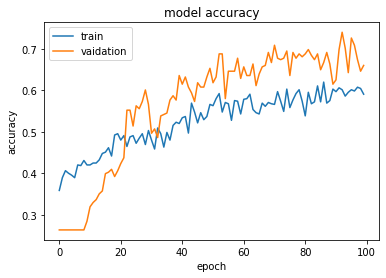

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()

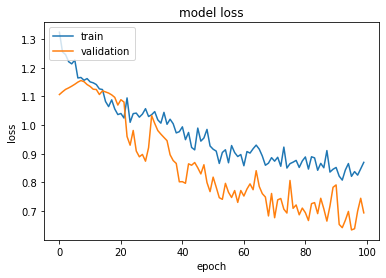

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [31]:
val_data = validation_data_generator.flow_from_directory(
    batch_size=1,
    directory=val_dir,
    shuffle=False,
    target_size=(img_height, img_width),
    class_mode='categorical'
)
idx2label_dict = {val_data.class_indices[k]: k for k in val_data.class_indices}

Found 288 images belonging to 3 classes.


In [33]:
model.load_weights('/content/PKModel2.h5')
y_pred = model.predict(val_data, steps=288)
y_true = val_data.classes
print(y_pred.shape,y_true.shape)

(288, 3) (288,)


In [34]:
import numpy as np

y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1,
       2, 2])

In [35]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [37]:
def get_key(mydict,val): 
    for key, value in mydict.items(): 
         if val == value: 
             return key 

In [38]:
def calReCall(y_true,y_pred,idx2label_dict,class_name):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index = [idx2label_dict[int(i)] for i in "012"],
                  columns = [idx2label_dict[int(i)] for i in "012"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,linewidths=.5)
    id = get_key(idx2label_dict,class_name)
    out = np.sum(cm, axis=1)
    return cm[id][id]/out[id]

Recall:  0.8157894736842105


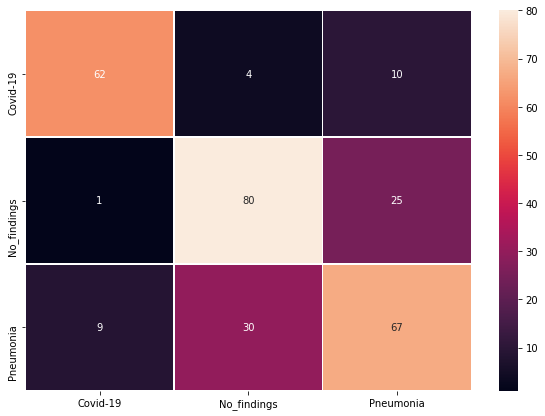

In [39]:
recallVal = calReCall(y_true,y_pred,idx2label_dict,'Covid-19')
print("Recall: ",recallVal)